In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
# Creacion de dataframe de demandad e energía
energia = pd.DataFrame()
years = range(2000,2024)

for year in years:
    url = f"""https://raw.githubusercontent.com/adeulofeu/Datafolio/main/Tesis/Datasets/Demanda_Energia_SIN_{year}.xlsx"""
    energia_temp = pd.read_excel(url,skiprows=2,header=1,engine='openpyxl')
    energia = pd.concat([energia,energia_temp],ignore_index=True)

In [3]:
# Información general del dataframe
print(energia.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8765 entries, 0 to 8764
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Fecha                    8765 non-null   object 
 1   Demanda Energia SIN kWh  8765 non-null   float64
 2   Generación kWh           8765 non-null   float64
 3   Demanda No Atendida kWh  8278 non-null   float64
 4   Exportaciones kWh        7216 non-null   float64
 5   Importaciones kWh        5848 non-null   float64
dtypes: float64(5), object(1)
memory usage: 411.0+ KB
None


In [4]:
# Cambio de tipo de variable a datetime64[ns] del atributo "Fecha"
energia["Fecha"] = energia["Fecha"].astype('datetime64[ns]')

In [5]:
# Revisar si hay valores nulos
energia.isnull().sum()

Fecha                         0
Demanda Energia SIN kWh       0
Generación kWh                0
Demanda No Atendida kWh     487
Exportaciones kWh          1549
Importaciones kWh          2917
dtype: int64

In [6]:
# Descripción estadística básica de los datos
energia.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
Fecha,8765,2011-12-31 08:00:03.285795840,2000-01-01 00:00:00,2005-12-31 00:00:00,2011-12-31 00:00:00,2017-12-31 00:00:00,2023-12-31 00:00:00,NaN
Demanda Energia SIN kWh,8765.0,162179960.437578,86794068.28,134621649.77,160029472.41,188235997.09,240833156.419999,32167843.916532
Generación kWh,8765.0,163380978.05063,86532048.28,138372328.75,162309251.67,187806782.46,250439131.22,31546909.456982
Demanda No Atendida kWh,8278.0,207220.288717,1000.0,37615.0,96950.0,231750.0,17208270.0,402234.867026
Exportaciones kWh,7216.0,2469740.671707,30.0,19286.1375,1512843.925,4592420.155,35052391.05,2903884.545368
Importaciones kWh,5848.0,954062.886224,0.06,4841.8675,36461.2,563164.1375,10911030.18,2041662.813119


In [7]:
energia["year"] = energia["Fecha"].dt.year
energia["month"] = energia["Fecha"].dt.month
energia['day'] = energia['Fecha'].dt.day
energia["Fecha"] = energia["Fecha"].dt.strftime("%Y-%m-%d")

In [8]:
# Creacion de dataframe de poblacion
url ="""https://raw.githubusercontent.com/adeulofeu/Datafolio/refs/heads/main/Tesis/Datasets/Poblaci%C3%B3n.csv"""
poblacion = pd.read_csv(url)

In [9]:
# Información general del dataframe
print(poblacion.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Periodo(AAAA)  74 non-null     object
 1   Población      74 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.3+ KB
None


In [11]:
# Cambio de tipo de variable a datetime64[ns] del atributo "Fecha"
poblacion["Periodo(AAAA)"] = poblacion["Periodo(AAAA)"].astype('datetime64[ns]')

In [12]:
# Revisar si hay valores nulos
poblacion.isnull().sum()

Periodo(AAAA)    0
Población        0
dtype: int64

In [13]:
# Descripción estadística básica de los datos
poblacion.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
Periodo(AAAA),74,1987-07-01 17:50:16.216216192,1950-12-31 00:00:00,1969-04-01 06:00:00,1987-07-01 12:00:00,2005-09-30 18:00:00,2023-12-31 00:00:00,NaN
Población,74.0,31697641.864865,13570943.0,21889817.5,31265472.0,41550931.75,52215503.0,11414523.86366


In [14]:
poblacion["year"] = poblacion["Periodo(AAAA)"].dt.year

In [15]:
# Creacion de dataframe de variables climaticas
url = """https://raw.githubusercontent.com/adeulofeu/Datafolio/refs/heads/main/Tesis/Datasets/Precipitacion_filtrado.csv"""
precipitaciones = pd.read_csv(url)

In [16]:
# Información general del dataframe
print(precipitaciones.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7231 entries, 0 to 7230
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   FechaObservacion  7231 non-null   object 
 1   ValorPonderado    7231 non-null   float64
dtypes: float64(1), object(1)
memory usage: 113.1+ KB
None


In [17]:
precipitaciones["FechaObservacion"] = precipitaciones["FechaObservacion"].astype("datetime64[ns]")

In [18]:
# Revisar si hay valores nulos
precipitaciones.isnull().sum()

FechaObservacion    0
ValorPonderado      0
dtype: int64

In [19]:
# Descripción estadística básica de los datos
precipitaciones.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
FechaObservacion,7231,2014-12-03 09:33:31.837920,2005-01-01 00:00:00,2009-12-14 12:00:00,2014-11-26 00:00:00,2019-11-10 12:00:00,2024-12-26 00:00:00,NaN
ValorPonderado,7231.0,7.774085,0.0,0.298571,0.866337,3.271988,282.421363,22.13077


In [20]:
precipitaciones["year"] = precipitaciones["FechaObservacion"].dt.year
precipitaciones["Fecha"] = precipitaciones["FechaObservacion"].dt.strftime("%Y-%m-%d")

In [35]:
# Creacion de dataframe de variables climaticas
url = """https://raw.githubusercontent.com/adeulofeu/Datafolio/refs/heads/main/Tesis/Datasets/Temps_filtrado.csv"""
temperaturas = pd.read_csv(url)

In [36]:
# Información general del dataframe
print(temperaturas.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8696 entries, 0 to 8695
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   FechaObservacion  8696 non-null   object 
 1   ValorPonderado    8696 non-null   float64
dtypes: float64(1), object(1)
memory usage: 136.0+ KB
None


In [37]:
temperaturas["FechaObservacion"] = temperaturas["FechaObservacion"].astype("datetime64[ns]")

In [38]:
# Revisar si hay valores nulos
temperaturas.isnull().sum()

FechaObservacion    0
ValorPonderado      0
dtype: int64

In [39]:
# Descripción estadística básica de los datos
temperaturas.describe().transpose()

,count,mean,min,25%,50%,75%,max,std
FechaObservacion,8696,2012-12-02 15:12:35.105795584,2001-01-01 00:00:00,2006-12-14 18:00:00,2012-11-26 12:00:00,2018-11-09 06:00:00,2024-12-26 00:00:00,NaN
ValorPonderado,8696.0,512.816558,0.0,176.624047,282.604539,652.677428,7687.185516,796.478473


In [40]:
temperaturas["year"] = temperaturas["FechaObservacion"].dt.year
temperaturas["Fecha"] = temperaturas["FechaObservacion"].dt.strftime("%Y-%m-%d")

Combinación de Datasets

In [22]:
# Combianación de dataset de energía y población
energia = energia.merge(poblacion,how="left",on="year")

In [23]:
# Combianación de dataset de energía y precipitaciones
energia = energia.merge(precipitaciones,how="left",on="Fecha")

In [ ]:
# Combianación de dataset de energía y temperaturas
energia = energia.merge(temperaturas,how="left",on="Fecha")

In [24]:
energia = energia.drop(columns={"Periodo(AAAA)","FechaObservacion","year_y"}).rename(columns={"year_x":"year","ValorPonderado":"Precipitacion (mm)"})

In [25]:
# Manejar valores faltantes en "Precipitacion (mm)" usando imputación (media)
energia['Precipitacion (mm)'] = energia['Precipitacion (mm)'].fillna(0)

# Se guarda el dataset final para el modelo
energia.to_csv("dataset.csv")

EDA

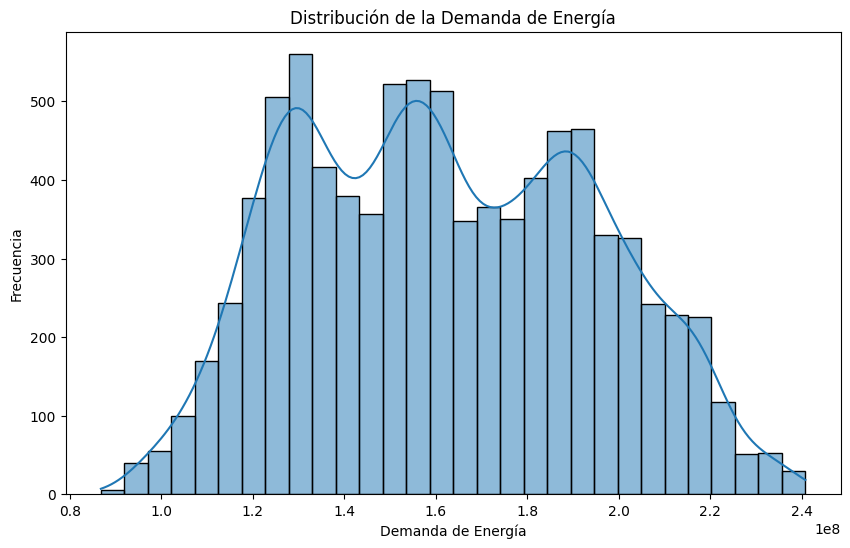

In [26]:
plt.figure(figsize=(10, 6))
sns.histplot(energia['Demanda Energia SIN kWh'], bins=30, kde=True)
plt.title('Distribución de la Demanda de Energía')
plt.xlabel('Demanda de Energía')
plt.ylabel('Frecuencia')
plt.show()

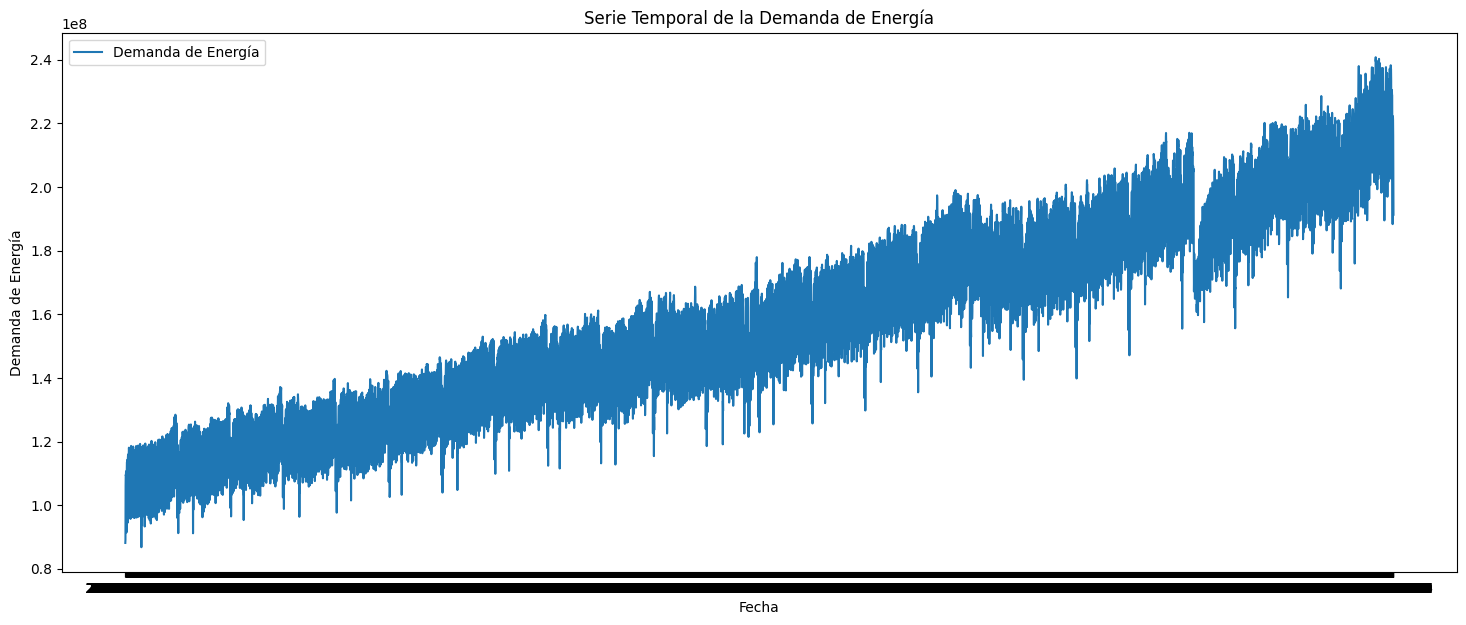

In [27]:
plt.figure(figsize=(18, 7))
plt.plot(energia['Fecha'], energia['Demanda Energia SIN kWh'], label='Demanda de Energía')
plt.title('Serie Temporal de la Demanda de Energía')
plt.xlabel('Fecha')
plt.ylabel('Demanda de Energía')
plt.legend()
plt.show()

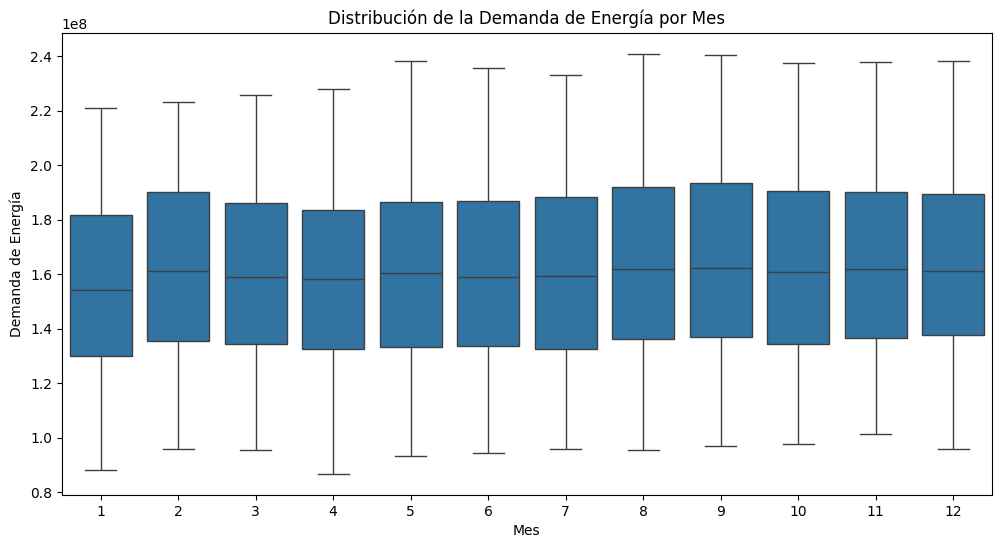

In [28]:
# Boxplot por mes
plt.figure(figsize=(12, 6))
sns.boxplot(x='month', y='Demanda Energia SIN kWh', data=energia)
plt.title('Distribución de la Demanda de Energía por Mes')
plt.xlabel('Mes')
plt.ylabel('Demanda de Energía')
plt.show()

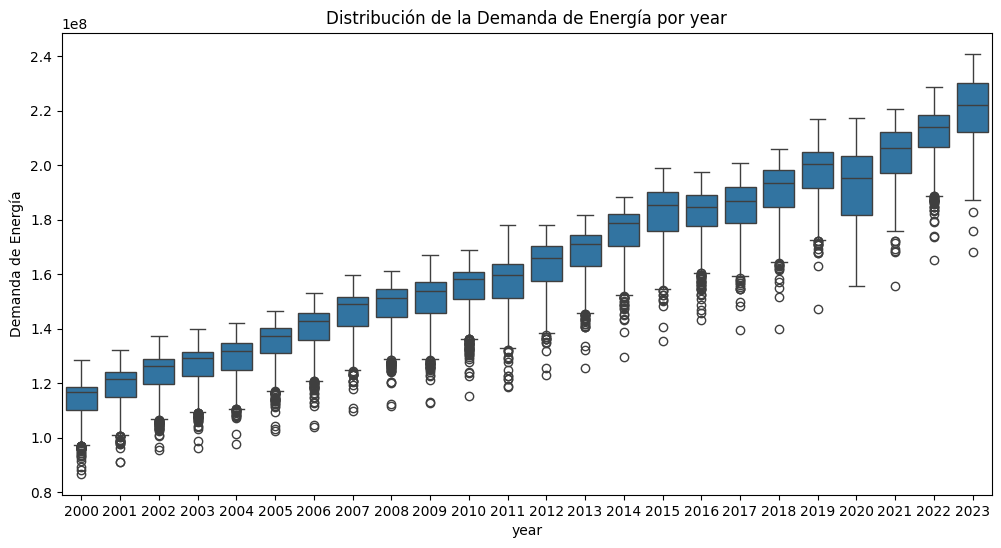

In [29]:
# Boxplot por year
plt.figure(figsize=(12, 6))
sns.boxplot(x='year', y='Demanda Energia SIN kWh', data=energia)
plt.title('Distribución de la Demanda de Energía por year')
plt.xlabel('year')
plt.ylabel('Demanda de Energía')
plt.show()

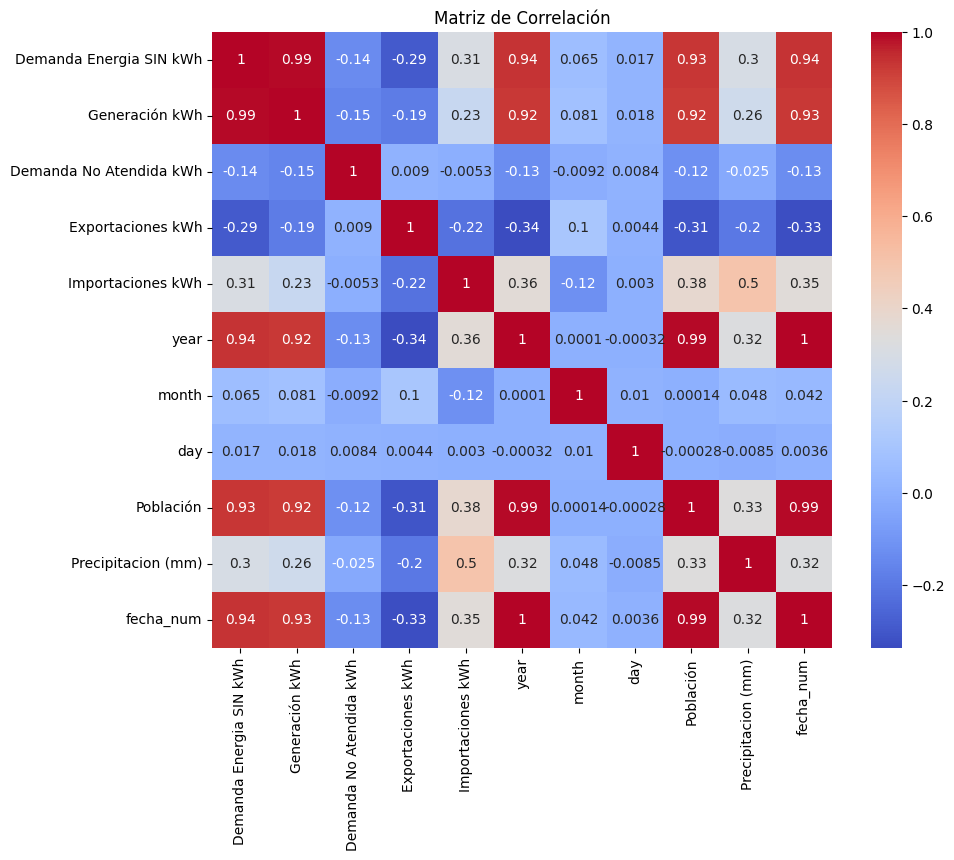

In [30]:
energia["fecha_num"] = pd.to_datetime(energia["Fecha"])
mstr = energia.drop(columns={"Fecha"})
plt.figure(figsize=(10, 8))
sns.heatmap(mstr.corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

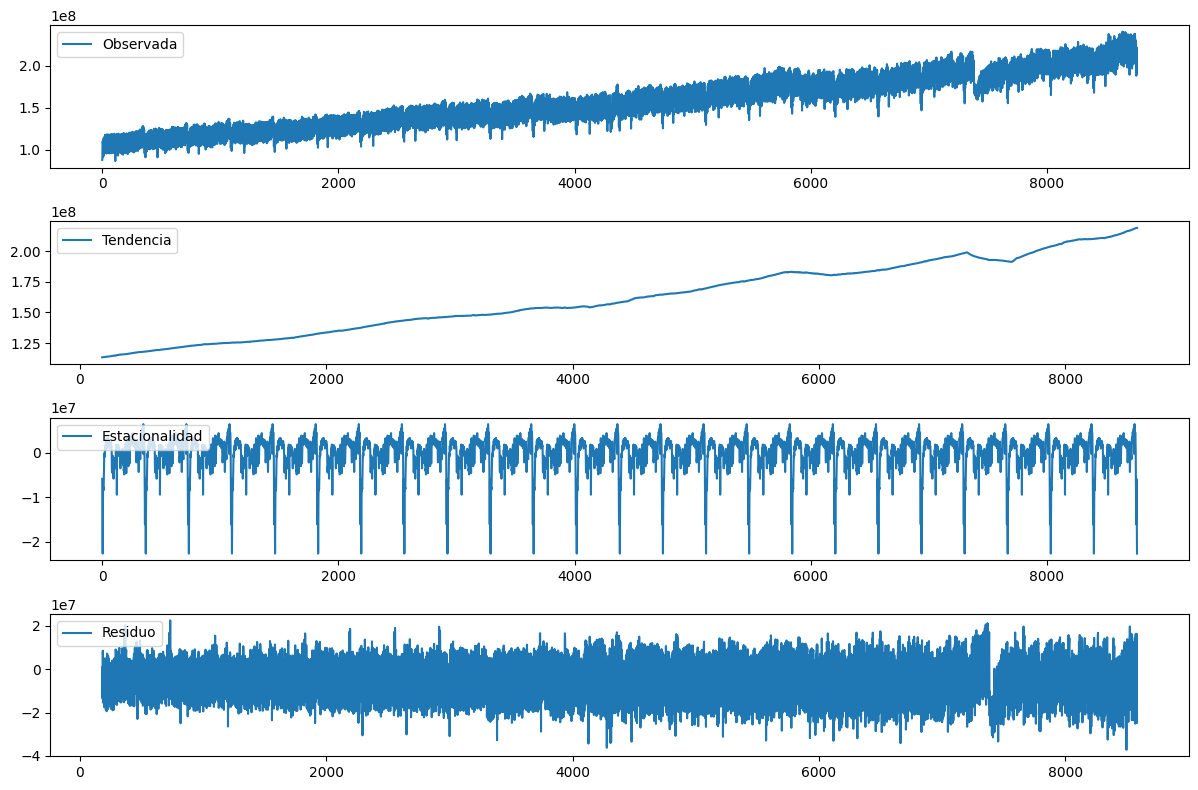

In [31]:
# Descomponer la serie temporal
decomposition = seasonal_decompose(energia['Demanda Energia SIN kWh'], model='additive', period=365)

# Visualizar los componentes
plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(decomposition.observed, label='Observada')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(decomposition.trend, label='Tendencia')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Estacionalidad')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(decomposition.resid, label='Residuo')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

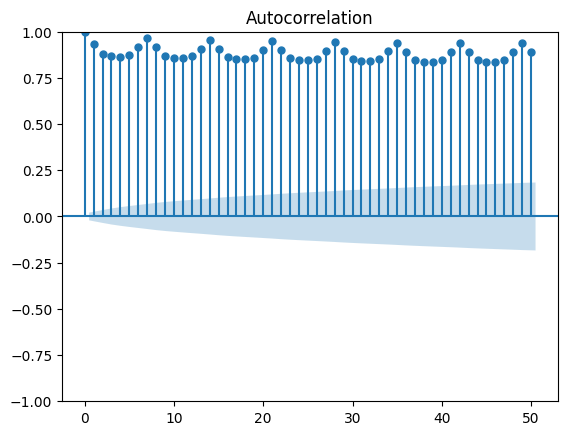

In [32]:
# Autocorrelación (ACF)
plt.figure(figsize=(10, 6))
plot_acf(energia['Demanda Energia SIN kWh'].dropna(), lags=50)
plt.show()

<Figure size 1000x600 with 0 Axes>

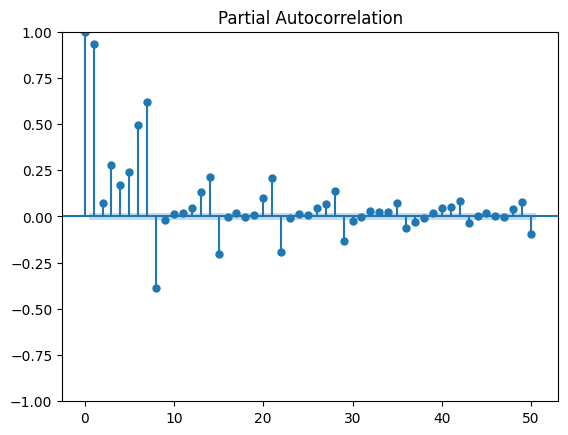

In [33]:
# Autocorrelación parcial (PACF)
plt.figure(figsize=(10, 6))
plot_pacf(energia['Demanda Energia SIN kWh'].dropna(), lags=50)
plt.show()

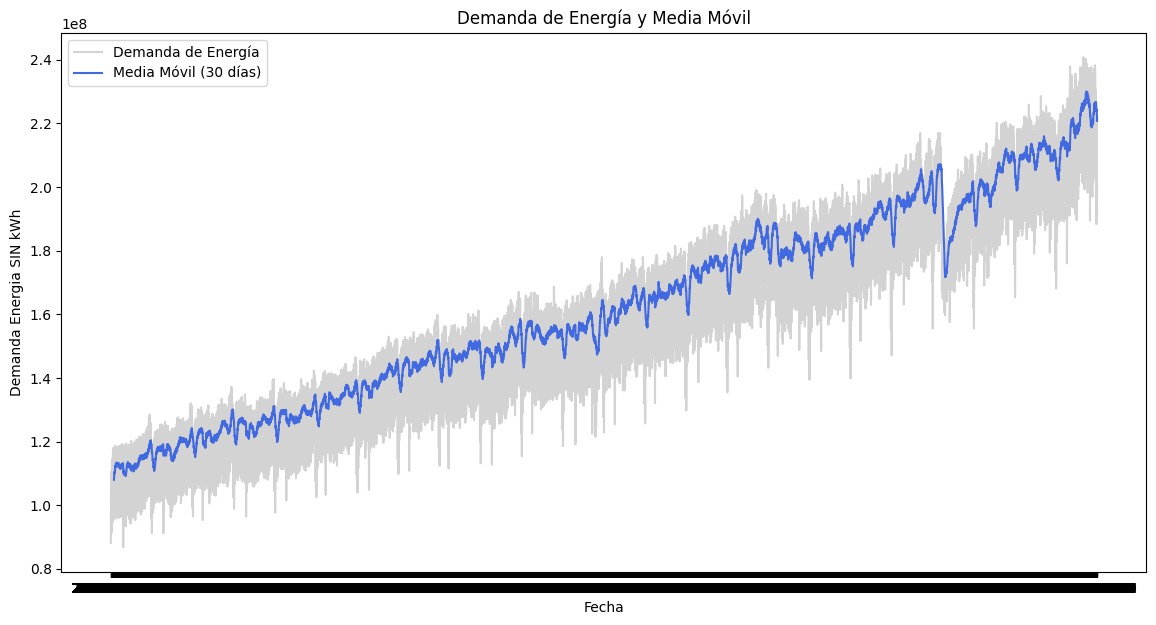

In [34]:
# Media móvil
energia['Media_Movil'] = energia['Demanda Energia SIN kWh'].rolling(window=30).mean()

plt.figure(figsize=(14, 7))
plt.plot(energia['Fecha'], energia['Demanda Energia SIN kWh'], label='Demanda de Energía', color='lightgrey')
plt.plot(energia['Fecha'], energia['Media_Movil'], label='Media Móvil (30 días)', color='royalblue')
plt.title('Demanda de Energía y Media Móvil')
plt.xlabel('Fecha')
plt.ylabel('Demanda Energia SIN kWh')
plt.legend()
plt.show()